In [2]:
!pip install keras


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install tensorflow


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [8]:
img_dir = r"C:\Users\jagya\OneDrive\Desktop\CNN\Brain+tumor+detection\Project Code\ML_model\Brain Tumor Data Set\Brain Tumor Data Set"

In [9]:
BATCH_SIZE = 64
IMAGE_SIZE = 150
input_shape = (150,150,1)

In [10]:
data_gen = ImageDataGenerator(rescale=1./255,
                              validation_split = 0.2)

In [11]:
train_gen = data_gen.flow_from_directory(img_dir,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size = BATCH_SIZE,
                                        color_mode= "grayscale",
                                        shuffle=True,
                                        class_mode = "binary",
                                        subset = "training")

Found 3681 images belonging to 2 classes.


In [12]:
val_gen = data_gen.flow_from_directory(img_dir,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size = BATCH_SIZE,
                                        color_mode= "grayscale",
                                        shuffle=False,
                                        class_mode = "binary",
                                        subset = "validation")

Found 919 images belonging to 2 classes.


In [13]:
labels = train_gen.class_indices
classes = list(labels.keys())

print(classes)

['Brain Tumor', 'Healthy']


# Making the model

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D ,BatchNormalization, Flatten, Dropout

In [15]:

model = Sequential()
model.add(keras.layers.InputLayer(input_shape=(150, 150, 1)))
model.add(Conv2D(16,(3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 512)               2

In [18]:
with tf.device('/device:GPU:0'):
    history = model.fit(train_gen,verbose=1,epochs=5,validation_data=val_gen,steps_per_epoch = 3681//64,validation_steps = 919//64)

Epoch 1/5


c:\Users\jagya\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


57/57 [==============================] - 67s 1s/step - loss: 0.7292 - accuracy: 0.6956 - val_loss: 0.3634 - val_accuracy: 0.8538
Epoch 2/5
57/57 [==============================] - 47s 816ms/step - loss: 0.2833 - accuracy: 0.8891 - val_loss: 0.1798 - val_accuracy: 0.9286
Epoch 3/5
57/57 [==============================] - 46s 813ms/step - loss: 0.1305 - accuracy: 0.9574 - val_loss: 0.0774 - val_accuracy: 0.9799
Epoch 4/5
57/57 [==============================] - 47s 824ms/step - loss: 0.0605 - accuracy: 0.9829 - val_loss: 0.0474 - val_accuracy: 0.9888
Epoch 5/5
57/57 [==============================] - 47s 816ms/step - loss: 0.0337 - accuracy: 0.9925 - val_loss: 0.0640 - val_accuracy: 0.9754


In [19]:
#train_loss, train_acc = model.evaluate(train_gen,steps_per_epoch = 3681//64,validation_steps = 919//64)
test_loss, test_acc   = model.evaluate(val_gen)

15/15 [==============================] - 3s 205ms/step - loss: 0.0625 - accuracy: 0.9761


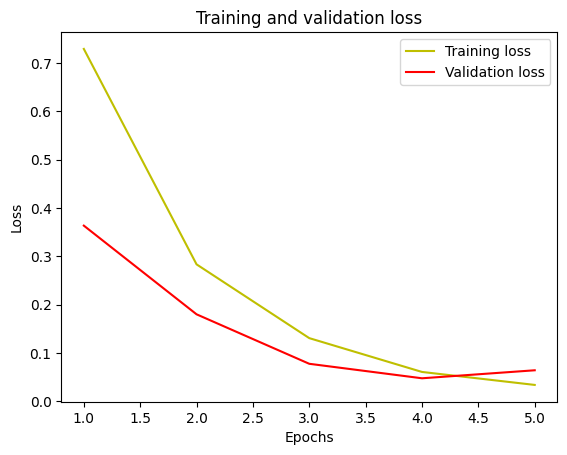

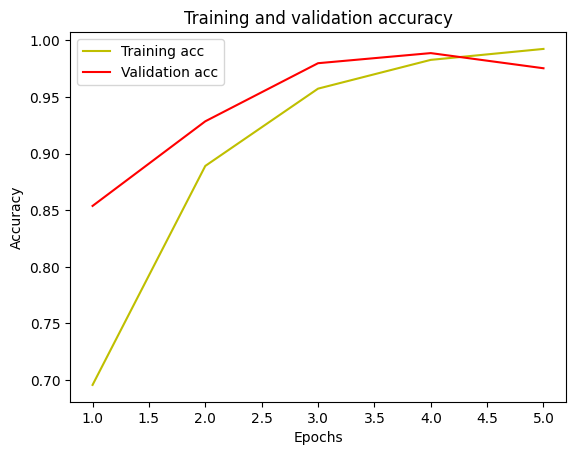

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
model.save('model.h5')

C:\Users\jagya\AppData\Local\Temp\ipykernel_13528\381535499.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = ImageOps.fit(image, size, Image.ANTIALIAS)


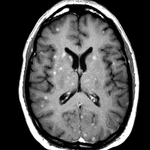

In [23]:
from matplotlib.pyplot import imshow
from PIL import Image, ImageOps


data = np.ndarray(shape=(1,150, 150, 1), dtype=np.float32)
image = Image.open(r"C:\Users\jagya\OneDrive\Desktop\CNN\Brain+tumor+detection\Project Code\ML_model\Brain Tumor Data Set\Brain Tumor Data Set\Healthy\Not Cancer  (6).jpg")
#image = Image.open(f'/Users/adityavs14/Documents/Internship/Pianalytix/Brain_tumor/ML_model/Brain_Tumor_Data_Set/Brain_Tumor/Cancer (1895).jpg')
size = (150, 150)
image = ImageOps.grayscale(image)
image = ImageOps.fit(image, size, Image.ANTIALIAS)
image_array = np.asarray(image)
display(image)
#normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
data = image_array.reshape((-1,150,150,1))
#data[0] = normalized_image_array

In [25]:
prediction = model.predict(data)
print(prediction[0][0])


1/1 [==============================] - 0s 60ms/step
1.0
